References:

https://pylessons.com/Beyond-DQN/
https://github.com/seungeunrho/minimalRL/blob/master/REINFORCE.py

In [19]:
import gym
import math

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.distributions import Categorical

from plot_durations import PlotDurations

In [20]:
##############################################################
# Model
##############################################################
class ActorCritic(nn.Module):
    def __init__(self, n_observations, n_actions):
        super(ActorCritic, self).__init__()
        self.fc1 = nn.Linear(n_observations, 256)
        self.fc_policy = nn.Linear(256, n_actions)
        self.fc_value = nn.Linear(256, 1)

    def policy(self, x, softmax_dim=1):
        x = F.relu(self.fc1(x))
        x = self.fc_policy(x)
        prob = F.softmax(x, dim=softmax_dim)
        return prob

    def value(self, x):
        x = F.relu(self.fc1(x))
        v = self.fc_value(x)
        return v

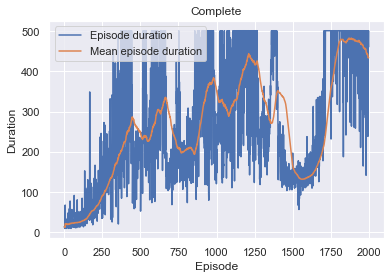

In [21]:
##############################################################
# Training
##############################################################
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

learning_rate = 0.0002
gamma         = 0.98

env = gym.make('CartPole-v1')
n_actions = env.action_space.n
n_observations = env.observation_space.shape[0]

model = ActorCritic(n_observations, n_actions)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


episode_durations = []
for n_epi in range(2000):
    s = env.reset()
    done = False

    t = 0
    while not done:  # CartPole-v1 forced to terminates at 500 step.
        prob = pi(torch.tensor(s, device=device, dtype=torch.float))
        m = Categorical(prob)
        a = m.sample()
        s_prime, r, done, info = env.step(a.item())
        pi.put_data((r, prob[a]))
        s = s_prime
        t += 1

    episode_durations.append(t + 1)
    PlotDurations.train_plot(episode_durations)
    pi.train_net()

env.close()
PlotDurations.complete_plot(episode_durations)

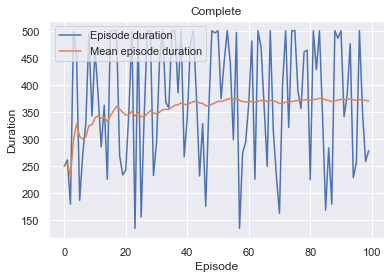

In [22]:
##############################################################
# Testing
##############################################################
num_episodes = 100
episode_durations = []
pi.eval()
for i_episode in range(num_episodes):
    s = env.reset()
    done = False

    t = 0
    while not done:
        prob = pi(torch.tensor(s, device=device, dtype=torch.float))
        m = Categorical(prob)
        a = m.sample()
        s_prime, r, done, info = env.step(a.item())
        s = s_prime
        t += 1

    episode_durations.append(t + 1)
    PlotDurations.train_plot(episode_durations)

env.close()
PlotDurations.complete_plot(episode_durations)

